In [2]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import plotly.io as pio
pio.templates.default = "plotly_white"

In [4]:
df = pd.read_csv("C:/25-26_R07_NARANJA/Datos/Transformados/df_limpio.csv")
df.columns
df.head

<bound method NDFrame.head of            ID  Edad  Ingresos  Monto_Inicial  Scoring_Crediticio  \
0      S97R7X    18     61628          83011                 397   
1      RLGTBY    50     82410          68642                 486   
2      SKE2P9    37    110810         101859                 765   
3      E2FB1D    56     16815         157551                 643   
4      TKSCGH    35     42315         180635                 645   
...       ...   ...       ...            ...                 ...   
50839  G5QJ7O    54    129974          22870                 501   
50840  FKB7Z1    35    100578          77233                 378   
50841  O5PRET    57    118190          74637                 645   
50842  WZEOVA    53     51976         153328                 400   
50843  O0VB8P    66     45051          14756                 436   

       Meses_Empleo  Num_Creditos  Ratio_Interes  Duracion  \
0               113             1           8.06        48   
1                14          

In [4]:
fig = px.histogram(
    df,
    x="Edad",
    nbins=30,
    title="Distribución de la Edad",
    opacity=0.75
)
fig.update_layout(bargap=0.1)
fig.show()

fig = px.histogram(
    df,
    x="Ingresos",
    nbins=40,
    title="Distribución de Ingresos"
)
fig.show()

In [12]:
jornada_cols = [
    "Tipo_Jornada_Laboral_Autónomo",
    "Tipo_Jornada_Laboral_Desempleado",
    "Tipo_Jornada_Laboral_Jornada completa",
    "Tipo_Jornada_Laboral_Tiempo parcial"
]

jornada_counts = df[jornada_cols].sum().reset_index()
jornada_counts.columns = ["Tipo_Jornada", "Cantidad"]

fig = px.bar(
    jornada_counts,
    x="Tipo_Jornada",
    y="Cantidad",
    title="Distribución del Tipo de Jornada Laboral"
)
fig.show()

In [22]:
df["Rango_Edad"] = pd.cut(
df["Edad"],
bins=[18, 25, 45, 65, 100],
labels=["18-25", "26-40", "41-65","65+"]
)

In [23]:
fig = px.box(
    df,
    x="Rango_Edad",
    y="Ingresos",
    title="Ingresos según Rango de Edad"
)
fig.show()

In [24]:
df_grouped = (
    df.groupby("Rango_Edad")[[
        "Ingresos",
        "Monto_Inicial",
        "Scoring_Crediticio",
        "Ratio_Interes"
    ]]
    .mean()
    .reset_index()
)

fig = px.bar(
    df_grouped,
    x="Rango_Edad",
    y="Scoring_Crediticio",
    title="Scoring Crediticio promedio por Rango de Edad"
)
fig.show()

fig = px.bar(
    df_grouped,
    x="Rango_Edad",
    y="Ingresos",
    title="Ingresos promedio por Rango de Edad"
)
fig.show()

C:\Users\sebas\AppData\Local\Temp\ipykernel_18488\827254626.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [7]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

bins = [18, 29, 39, 49, 59, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

df = df.copy()
df['Perfil_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels)

perfiles = df['Perfil_Edad'].dropna().unique()

edu_cols = [
    'Estudios_Escolar',
    'Estudios_Grado Universitario',
    'Estudios_Máster'
]

labor_cols = [
    'Tipo_Jornada_Laboral_Autónomo',
    'Tipo_Jornada_Laboral_Desempleado',
    'Tipo_Jornada_Laboral_Jornada completa',
    'Tipo_Jornada_Laboral_Tiempo parcial'
]

civil_cols = [
    'Estado_Civil_Casado',
    'Estado_Civil_Divorciado',
    'Estado_Civil_Soltero'
]

fin_cols = [
    'Ingresos',
    'Monto_Inicial',
    'Scoring_Crediticio',
    'Num_Creditos',
    'Ratio_Interes',
    'Ratio_Deuda_Ingresos',
    'Duracion'
]

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[fin_cols] = scaler.fit_transform(df[fin_cols])

fig = make_subplots(
    rows=2, cols=2,
    specs=[
        [{'type': 'polar'}, {'type': 'polar'}],
        [{'type': 'polar'}, {'type': 'polar'}]
    ],
    subplot_titles=[
        'Nivel de estudios',
        'Situación laboral',
        'Estado civil',
        'Perfil financiero'
    ]
)

traces_per_profile = 4

for perfil in perfiles:
    subset = df_scaled[df_scaled['Perfil_Edad'] == perfil]

    vals = subset[edu_cols].mean().values
    fig.add_trace(
        go.Scatterpolar(
            r=list(vals) + [vals[0]],
            theta=edu_cols + [edu_cols[0]],
            fill='toself',
            visible=False
        ),
        row=1, col=1
    )

    vals = subset[labor_cols].mean().values
    fig.add_trace(
        go.Scatterpolar(
            r=list(vals) + [vals[0]],
            theta=labor_cols + [labor_cols[0]],
            fill='toself',
            visible=False
        ),
        row=1, col=2
    )

    vals = subset[civil_cols].mean().values
    fig.add_trace(
        go.Scatterpolar(
            r=list(vals) + [vals[0]],
            theta=civil_cols + [civil_cols[0]],
            fill='toself',
            visible=False
        ),
        row=2, col=1
    )

    vals = subset[fin_cols].mean().values
    fig.add_trace(
        go.Scatterpolar(
            r=list(vals) + [vals[0]],
            theta=fin_cols + [fin_cols[0]],
            fill='toself',
            visible=False
        ),
        row=2, col=2
    )


for i in range(traces_per_profile):
    fig.data[i].visible = True

buttons = []
total_traces = len(fig.data)

for idx, perfil in enumerate(perfiles):
    visible = [False] * total_traces
    start = idx * traces_per_profile
    end = start + traces_per_profile

    for i in range(start, end):
        visible[i] = True

    buttons.append(
        dict(
            label=str(perfil),
            method='update',
            args=[
                {'visible': visible},
                {'title': f'Perfil de Edad: {perfil}'}
            ]
        )
    )


fig.update_layout(
    height=900,
    title=f'Perfil de Edad: {perfiles[0]}',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    updatemenus=[
        dict(
            type='buttons',
            direction='down',
            x=-0.30,
            y=0.95,
            buttons=buttons,
            showactive=True
        )
    ]
)

fig.show()


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid", palette="muted")
# 

In [10]:
bins = [18, 25, 35, 45, 60, 100]
labels = ["18-25", "26-35", "36-45", "46-60", "60+"]

df["Rango_Edad"] = pd.cut(df["Edad"], bins=bins, labels=labels, right=True)


C:\Users\sebas\AppData\Local\Temp\ipykernel_21320\661040484.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



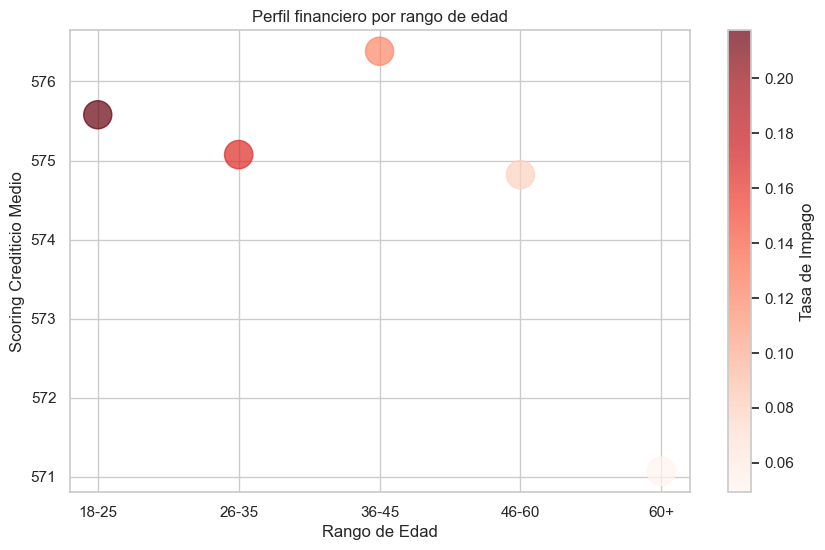

In [11]:
perfil_edad = (
    df.groupby("Rango_Edad")
    .agg(
        Scoring_Medio=("Scoring_Crediticio", "mean"),
        Ingresos_Medios=("Ingresos", "mean"),
        Tasa_Impago=("Impago", "mean")
    )
    .reset_index()
)

plt.figure(figsize=(10,6))
plt.scatter(
    x=perfil_edad["Rango_Edad"],
    y=perfil_edad["Scoring_Medio"],
    s=perfil_edad["Ingresos_Medios"] / 200,
    c=perfil_edad["Tasa_Impago"],
    cmap="Reds",
    alpha=0.7
)

plt.colorbar(label="Tasa de Impago")
plt.xlabel("Rango de Edad")
plt.ylabel("Scoring Crediticio Medio")
plt.title("Perfil financiero por rango de edad")
plt.show()


C:\Users\sebas\AppData\Local\Temp\ipykernel_21320\3458223140.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



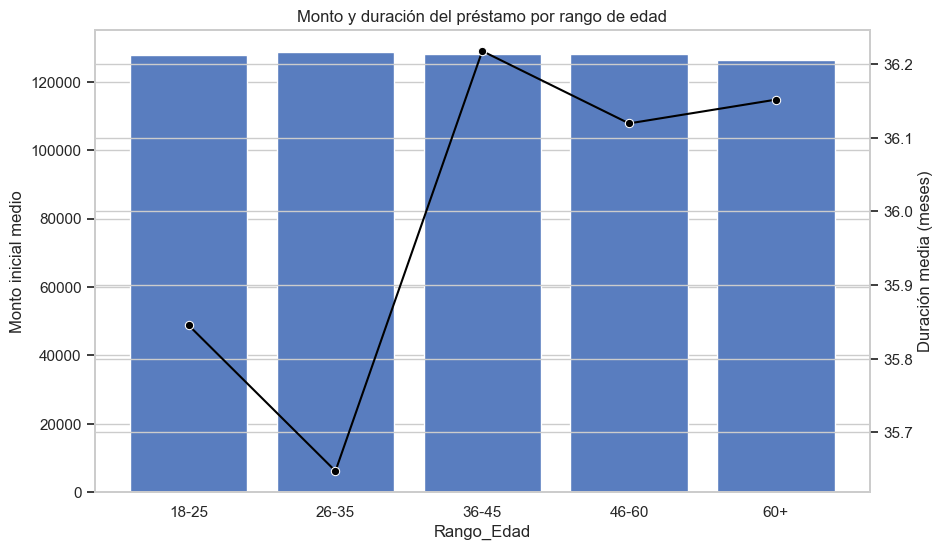

In [12]:
edad_prestamo = (
    df.groupby("Rango_Edad")
    .agg(
        Monto_Medio=("Monto_Inicial", "mean"),
        Duracion_Media=("Duracion", "mean")
    )
    .reset_index()
)

fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(
    data=edad_prestamo,
    x="Rango_Edad",
    y="Monto_Medio",
    ax=ax1
)

ax1.set_ylabel("Monto inicial medio")

ax2 = ax1.twinx()
sns.lineplot(
    data=edad_prestamo,
    x="Rango_Edad",
    y="Duracion_Media",
    marker="o",
    color="black",
    ax=ax2
)

ax2.set_ylabel("Duración media (meses)")
plt.title("Monto y duración del préstamo por rango de edad")
plt.show()


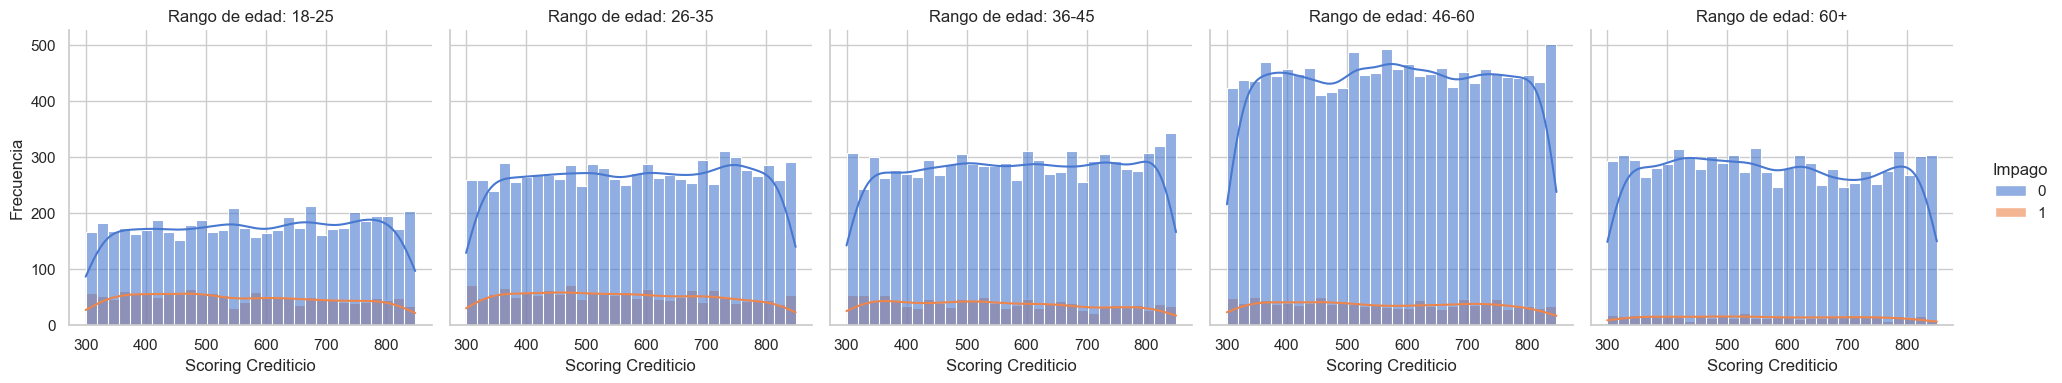

In [13]:
g = sns.displot(
    data=df,
    x="Scoring_Crediticio",
    hue="Impago",
    col="Rango_Edad",
    kind="hist",
    kde=True,
    height=4,
    aspect=1,
    bins=30,
    alpha=0.6
)

g.set_titles("Rango de edad: {col_name}")
g.set_axis_labels("Scoring Crediticio", "Frecuencia")
plt.show()


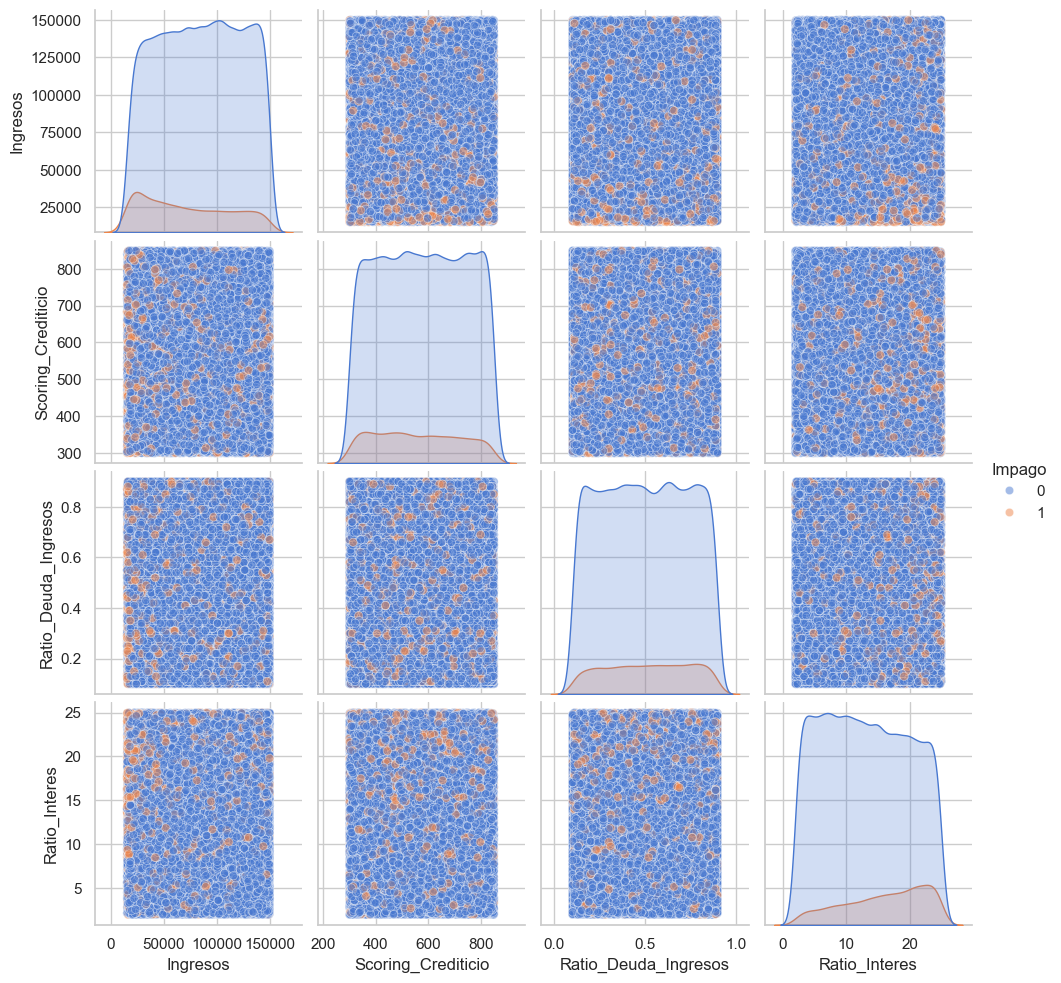

In [14]:
vars_pairplot = [
    "Ingresos",
    "Scoring_Crediticio",
    "Ratio_Deuda_Ingresos",
    "Ratio_Interes"
]

sns.pairplot(
    df[vars_pairplot + ["Impago"]],
    hue="Impago",
    diag_kind="kde",
    plot_kws={"alpha": 0.5}
)

plt.show()


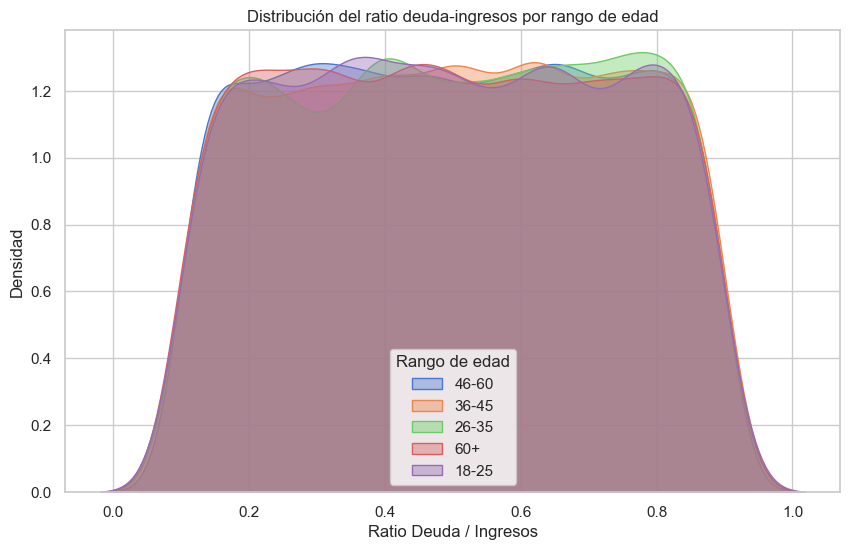

In [15]:
plt.figure(figsize=(10,6))

for rango in df["Rango_Edad"].dropna().unique():
    subset = df[df["Rango_Edad"] == rango]
    sns.kdeplot(
        subset["Ratio_Deuda_Ingresos"],
        label=rango,
        fill=True,
        alpha=0.4
    )

plt.xlabel("Ratio Deuda / Ingresos")
plt.ylabel("Densidad")
plt.title("Distribución del ratio deuda-ingresos por rango de edad")
plt.legend(title="Rango de edad")
plt.show()


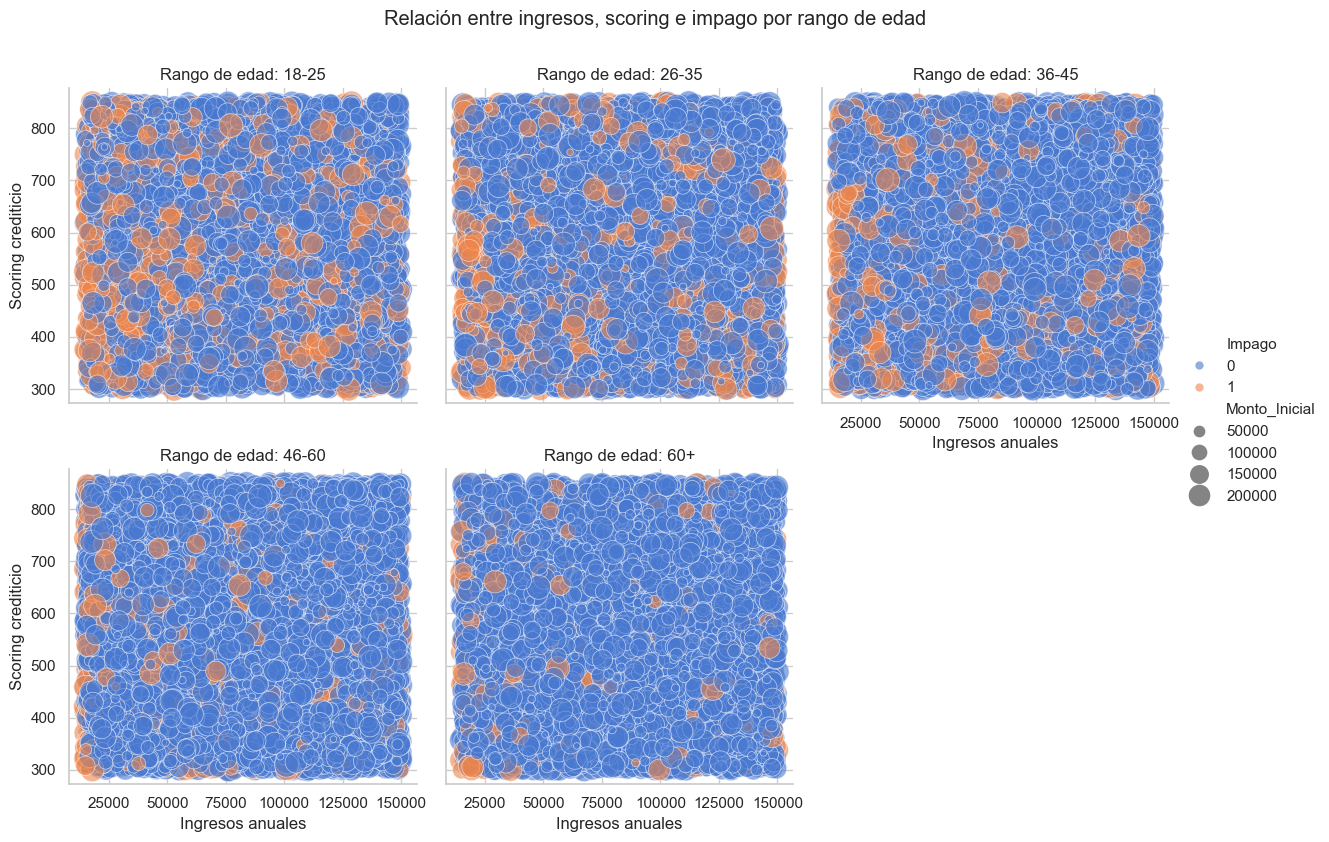

In [16]:
g = sns.relplot(
    data=df,
    x="Ingresos",
    y="Scoring_Crediticio",
    hue="Impago",
    size="Monto_Inicial",
    col="Rango_Edad",
    col_wrap=3,
    alpha=0.6,
    height=4,
    aspect=1,
    sizes=(20, 300)
)

g.set_axis_labels("Ingresos anuales", "Scoring crediticio")
g.set_titles("Rango de edad: {col_name}")
g.fig.suptitle(
    "Relación entre ingresos, scoring e impago por rango de edad",
    y=1.05
)

plt.show()
